<div>
  <center><h2><strong>Processamento Digital de Sinais</strong></h2></center>
  <center><h3><strong>ESTUDO DIRIGIDO</strong></h3></center>
</div><p>


<div>
<center><strong>Semestre:</strong> 2024.2<p></center>
<center><strong>Livro Texto:</strong> Digital Signal Processing using MatLab<p></center>
<strong>Professor:</strong> Moacy Pereira da Silva<p>
<strong>Aluno:</strong> Ivysson Fernandes de Queiroz Uchôa<p>

## __Capítulo 7 - Design de Filtros FIR__

---

<p>No processamento digital de sinais, existem dois tipos importantes de sistemas
<p>O primeiro tipo de sistema realiza a filtragem de sinais no domínio do tempo e, portanto, é chamado de filtro digital. 
<p>O segundo tipo de sistema fornece representação de sinais no domínio da frequência e é chamado de analisador de espectro

### <u> Preliminares

<p>O design de um filtro digital é realizado em três etapas:
<p>1) <strong>Especificações:</strong> Antes de podermos projetar um filtro, precisamos ter algumas especificações. Essas especificações são determinadas pelas aplicações.
<p>2) <strong>Aproximações:</strong> Uma vez que as especificações são definidas, usamos conceitos e matemática para chegar a uma descrição do filtro que se aproxime das especificações. Esta etapa é o tópico do design do filtro.
<p>3) <strong>Implementação:</strong> O produto da etapa acima é uma descrição do filtro na forma de uma equação de diferença ou uma função de sistema H(z)

### <u> Propriedades dos Filtros FIR de Fase Linear

* <strong>Resposta ao Impulso h(n)</strong>

<p style="margin-left: 30px;">Para um filtro FIR de fase linear, a resposta em frequência deve ter uma fase linear da forma:
<center>

![image.png](images/image29.png)
</center>
<p style="margin-left: 30px;">onde 𝛼 é o atraso de grupo constante

<p style="margin-left: 30px;">De acordo com a teoria de processamento de sinais, para que essa equação seja válida, a resposta ao impulso h(n) do filtro deve obedecer a uma das duas condições:
<li style="margin-left: 30px;"><strong>Simetria:</strong> h(n) = h(M−1−n)
<li style="margin-left: 30px;"><strong>Anti-simetria:</strong> h(n) = −h(M−1−n)</li>

<p style="margin-left: 30px;">onde 𝑀 é o comprimento da resposta ao impulso do filtro FIR.

<p style="margin-left: 30px;">O parâmetro α representa o índice de simetria, e sua fórmula depende se 𝑀 é ímpar ou par:

$$
α=\frac{M -1}{2}
$$
<p style="margin-left: 30px;">Isso significa que a resposta ao impulso é simétrica ou anti-simétrica em torno do ponto 𝛼


* <strong>Resposta em Frequência H(e^jω)</strong>

<p style="margin-left: 30px;">Escrevemos H(e^jω) como:
<center>

![image.png](images/image30.png)
</center>

<p style="margin-left: 30px;">Dependendo da simetria ou anti-simetria da resposta ao impulso h(n) e do tamanho M (par ou ímpar), obtemos quatro tipos de filtros FIR de fase linear:

<p style="margin-left: 30px;"><strong>Tipo 1: Impulso Simétrico, 𝑀 Ímpar</strong>
<p style="margin-left: 30px;"><strong>→ </strong>h(n) = h(M−1−n) (Simétrico)
<p style="margin-left: 30px;"><strong>→ </strong>𝑀 é ímpar
<p style="margin-left: 30px;"><strong>→ </strong>Usado para filtros passa-baixa, passa-alta, passa-faixa e rejeita-faixa
<p style="margin-left: 30px;"><strong>→ </strong>A resposta em frequência é da forma:
<center>

![image.png](images/image31.png)
</center>

<p style="margin-left: 30px;"><strong>→ </strong>Exemplo de Implementação:

In [7]:
import numpy as np

def hr_type1(h):
    M = len(h)
    L = (M - 1) // 2

    a = np.concatenate(([h[L]], 2 * h[L-1::-1]))

    n = np.arange(0, L + 1)

    w = np.linspace(0, np.pi, 501).reshape(-1, 1)
    Hr = np.cos(w @ n.reshape(1, -1)) @ a.reshape(-1, 1)

    return Hr, w, a, L

<p style="margin-left: 30px;"><strong>Tipo 2: Impulso Simétrico, 𝑀 Par</strong>
<p style="margin-left: 30px;"><strong>→ </strong>h(n) = h(M−1−n) (Simétrico)
<p style="margin-left: 30px;"><strong>→ </strong>𝑀 é par
<p style="margin-left: 30px;"><strong>→ </strong>A resposta em frequência tem um zero garantido em ω=π
<p style="margin-left: 30px;"><strong>→ </strong>Não pode ser usada para filtros passa-alta ou rejeita-faixa
<p style="margin-left: 30px;"><strong>→ </strong>A resposta em frequência é da forma:
<center>

![image.png](images/image32.png)
</center>

<p style="margin-left: 30px;"><strong>→ </strong>Exemplo de Implementação:

In [5]:
import numpy as np

def hr_type2(h):
    M = len(h)
    L = M // 2

    b = 2 * h[L-1::-1] 
    n = np.arange(1, L + 1) - 0.5 

    w = np.linspace(0, np.pi, 501).reshape(-1, 1)
    Hr = np.cos(w @ n.reshape(1, -1)) @ b.reshape(-1, 1)

    return Hr, w, b, L


<p style="margin-left: 30px;"><strong>Tipo 3: Impulso Anti-Simétrico, 𝑀 Ímpar</strong>
<p style="margin-left: 30px;"><strong>→ </strong>h(n) = −h(M−1−n) (Anti-Simétrico)
<p style="margin-left: 30px;"><strong>→ </strong>𝑀 é ímpar
<p style="margin-left: 30px;"><strong>→ </strong>Não pode ser usado para filtros passa-baixa ou passa-alta, mas é usado para transformadores de Hilbert e diferenciadores digitais
<p style="margin-left: 30px;"><strong>→ </strong>A resposta em frequência contém apenas senos:
<center>

![image.png](images/image33.png)
</center>
<p style="margin-left: 30px;"><strong>→ </strong>A resposta em frequência é zero em ω=0 e ω=π

<p style="margin-left: 30px;"><strong>→ </strong>Exemplo de Implementação:

In [6]:
import numpy as np

def hr_type3(h):
    M = len(h)
    L = (M - 1) // 2

    c = 2 * h[L::-1] 
    n = np.arange(0, L + 1)

    w = np.linspace(0, np.pi, 501).reshape(-1, 1)
    Hr = np.sin(w @ n.reshape(1, -1)) @ c.reshape(-1, 1)

    return Hr, w, c, L

<p style="margin-left: 30px;"><strong>Tipo 4: Impulso Anti-Simétrico, 𝑀 Par</strong>
<p style="margin-left: 30px;"><strong>→ </strong>h(n) = −h(M−1−n) (Anti-Simétrico)
<p style="margin-left: 30px;"><strong>→ </strong>𝑀 é par
<p style="margin-left: 30px;"><strong>→ </strong>Similar ao Tipo 3, mas contém zeros em ω=0, tornando-o útil para diferenciadores digitais
<p style="margin-left: 30px;"><strong>→ </strong>A resposta em frequência é:
<center>

![image.png](images/image34.png)
</center>
<p style="margin-left: 30px;"><strong>→ </strong>Exemplo de Implementação:

In [8]:
import numpy as np

def hr_type4(h):
    M = len(h)
    L = M // 2

    d = 2 * h[L-1::-1]
    n = np.arange(1, L + 1) - 0.5 

    w = np.linspace(0, np.pi, 501).reshape(-1, 1) 
    Hr = np.sin(w @ n.reshape(1, -1)) @ d.reshape(-1, 1)

    return Hr, w, d, L

### <u> Técnicas de Projeto de Janelas

<p>A ideia básica por trás do projeto de janelas é escolher um filtro seletivo de frequência ideal adequado e, em seguida, truncar (ou fazer uma janela) sua resposta de impulso para obter um filtro FIR de fase linear e causal
<p>Um LPF ideal de largura de banda ωc < π é dado por:
<center>

![image.png](images/image35.png)
</center>

<p><strong>O Efeito de Gibbs</strong> é um fenômeno que ocorre ao simplesmente truncarmos a resposta ao impulso do filtro ideal, causando oscilações indesejadas na resposta em frequência que resulta em ripples nas bandas de passagem e rejeição
<p>A solução é, em vez de truncar abruptamente, aplicamos uma função janela para suavizar a transição
<p>A operação de janela é definida como:

$$
h(n)=hd(n)w(n)
$$

<p>onde <u>hd(n)</u> é a resposta ao impulso do filtro ideal e <u>w(n)</u> é a janela aplicada para limitar e suavizar os coeficientes
<p>Isso reduz as oscilações e melhora o comportamento do filtro

<p><strong>Janela Retangular</strong>
<p style="margin-left: 30px;"><strong>→ </strong>É dada pela formula:

$$
w(n)=1,0≤n≤M−1
$$

<p style="margin-left: 30px;"><strong>→ </strong>É simples e fácil de implementar, porém possui a pior atenuação na banda de rejeição e causa forte efeito de Gibbs

<center>

![image.png](images/image37.png)
</center>

<p><strong>Janela Bartlett (Triangular)</strong>
<p style="margin-left: 30px;"><strong>→ </strong>É dada pela formula:
<center>

![image.png](images/image36.png)
</center>
<p style="margin-left: 30px;"><strong>→ </strong>Reduz os ripples em relação à janela retangular, porém possui menor atenuação na banda de rejeição

<center>

![image.png](images/image38.png)
</center>

<p><strong>Janela Hann</strong>
<p style="margin-left: 30px;"><strong>→ </strong>É dada pela formula:

$$
w(n) = 0.5[1-cos(\frac{2πn}{M - 1})]
$$

<p style="margin-left: 30px;"><strong>→ </strong>Boa atenuação na banda de rejeição e tem uma melhor redução do efeito de Gibbs, mas também possui uma maior largura da banda de transição

<center>

![image.png](images/image39.png)
</center>

<p><strong>Janela Hamming</strong>
<p style="margin-left: 30px;"><strong>→ </strong>É dada pela formula:

$$
w(n)=0.54−0.46cos(\frac{2πn}{M - 1})
$$

<p style="margin-left: 30px;"><strong>→ </strong>Melhor atenuação na banda de rejeição e reduz mais o efeito de Gibbs em comparação à janela Hann
<p style="margin-left: 30px;"><strong>→ </strong>Porém ainda tem uma banda de transição larga

<center>

![image.png](images/image40.png)
</center>

<p><strong>Janela Blackman</strong>
<p style="margin-left: 30px;"><strong>→ </strong>É dada pela formula:

$$
w(n)=0.42−0.5cos(\frac{2πn}{M - 1})+0.08cos(\frac{4πn}{M - 1})
$$

<p style="margin-left: 30px;"><strong>→ </strong>Excelente atenuação na banda de rejeição e suaviza bem as transições
<p style="margin-left: 30px;"><strong>→ </strong>Porém a largura da banda de transição é ainda maior.
<center>

![image.png](images/image41.png)
</center>

<p><strong>Janela Kaiser (Ajustável)</strong>
<p style="margin-left: 30px;"><strong>→ </strong>É dada pela formula:

<center>

![image.png](images/image43.png)
</center>

<p style="margin-left: 30px;"><strong>→ </strong>onde 𝐼0(𝑥) é a função de Bessel de ordem zero
<p style="margin-left: 30px;"><strong>→ </strong>A janela mais flexível → o parâmetro 𝛽 ajusta a atenuação na banda de rejeição
<p style="margin-left: 30px;"><strong>→ </strong>Pode alcançar atenuação acima de 60 dB sem ampliar tanto a banda de transição
<p style="margin-left: 30px;"><strong>→ </strong>Porém requer cálculos mais complexos
<center>

![image.png](images/image42.png)
</center>

### <u> Técnicas de Projeto de Amostragem de Frequência

<p>A técnica de amostragem na frequência é um método alternativo para projetar filtros FIR 
<p>Ao contrário do método da janela, que parte da resposta ao impulso de um filtro ideal, a abordagem de amostragem na frequência trabalha diretamente na resposta em frequência do filtro

<p>A ideia principal desse método é definir amostras da resposta em frequência desejada e então calcular a resposta ao impulso h(n) a partir dessas amostras
<p>1) Especificamos diretamente a resposta em frequência H(e^jω) nas frequências desejadas
<p>2) Calculamos a Transformada Inversa Discreta de Fourier (IDFT) para obter h(n)
<p>3) O filtro resultante pode ser ajustado para obter uma resposta de fase linear
<p>A equação básica usada para obter a resposta ao impulso a partir da resposta em frequência amostrada é:
<center>

![image.png](images/image44.png)
</center>


<p>Demonstração da técnica de amostragem de frequência:
<center>

![image.png](images/image45.png)
</center>

<p>Funcionamento do Método:
<p><strong>Passo 1: Definir as Amostras da Resposta em Frequência</strong>
<li style="margin-left: 30px;">Escolhemos N pontos uniformemente distribuídos entre ω=0 e ω=π
<li style="margin-left: 30px;">Esses valores correspondem a uma DFT amostrada da resposta em frequência desejada
<p>

<p><strong>Passo 2: Aplicar a IDFT para Obter h(n)</strong>
<li style="margin-left: 30px;">Depois de definirmos as amostras da resposta em frequência, aplicamos a Transformada Inversa Discreta de Fourier (IDFT) para calcular os coeficientes da resposta ao impulso h(n)
<li style="margin-left: 30px;">Para garantir uma fase linear, a resposta ao impulso h(n) deve ser simétrica ou anti-simétrica, dependendo da aplicação
<p>

<p><strong>Passo 3: Ajustar a Resposta ao Impulso</strong>
<li style="margin-left: 30px;">Se o filtro resultante não atender exatamente às especificações, podemos modificar os valores amostrados da resposta em frequência e recalcular a IDFT
<li style="margin-left: 30px;">Outra abordagem é interpolar suavemente os valores da resposta em frequência para reduzir oscilações indesejadas

* <strong>Exemplo 1:</strong>Considerando um filtro passa-baixo com as especificações abaixo, determine a resposta de impulso:

$$
ωp = 0.2π, Rp = 0.25 dB
$$
$$
ωs = 0.3π, As = 50 dB
$$

<p>Solução

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

M = 20
alpha = (M - 1) / 2
l = np.arange(0, M)
wl = (2 * np.pi / M) * l

Hrs = np.array([1, 1, 1] + [0] * 15 + [1, 1])


Hdr = np.array([1, 1, 0, 0])
wdl = np.array([0, 0.25, 0.25, 1])


k1 = np.arange(0, int((M - 1) / 2) + 1)  
k2 = np.arange(int((M - 1) / 2) + 1, M) 


angH = np.concatenate([
    -alpha * (2 * np.pi) / M * k1,  # Fase para k1
    alpha * (2 * np.pi) / M * (M - k2)  # Fase para k2
])


H = Hrs * np.exp(1j * angH)
h = np.real(np.fft.ifft(H, M))

In [12]:
# Função para calcular a resposta em frequência 
def freqz_m(b, a, worN=512):
    w, h = freqz(b, a, worN=worN, whole=True)
    mag = np.abs(h)
    db = 20 * np.log10((mag + np.finfo(float).eps) / np.max(mag))
    pha = np.angle(h)
    grd = np.diff(np.unwrap(pha))
    return db, mag, pha, grd, w

# Função para calcular a resposta em frequência do tipo 2
def Hr_Type2(h):
    M = len(h)
    L = M // 2
    Hr = np.zeros(L + 1)
    ww = np.linspace(0, np.pi, L + 1)
    for k in range(L + 1):
        Hr[k] = 2 * np.sum(h[:L] * np.cos((2 * np.pi / M) * (k) * (np.arange(0.5, L + 0.5))))
    return Hr, ww, L

# Cálculo da resposta em frequência
db, mag, pha, grd, w = freqz_m(h, 1)
Hr, ww, L = Hr_Type2(h)

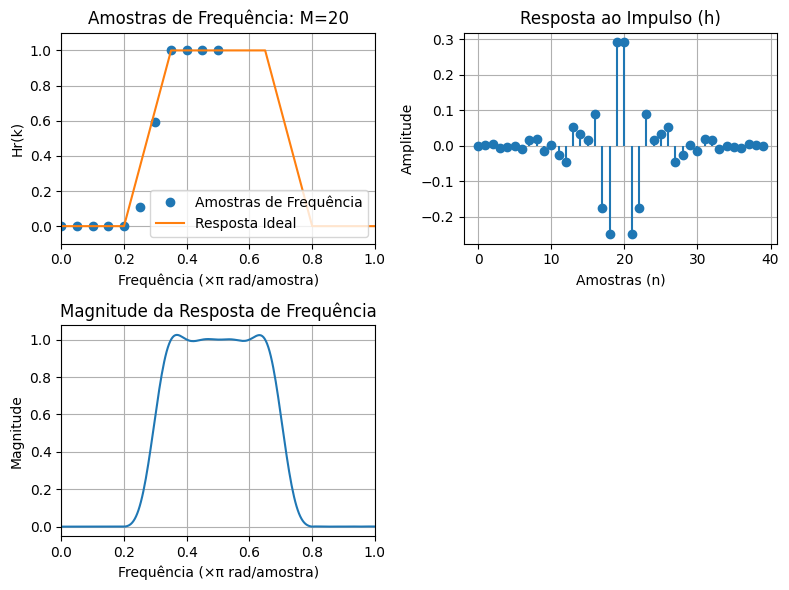

In [17]:
# Plotagem
plt.figure(figsize=(8, 6))

plt.subplot(2, 2, 1)
plt.plot(wl[:11] / np.pi, Hrs[:11], 'o', label='Amostras de Frequência')
plt.plot(wdl, Hdr, label='Resposta Ideal')
plt.axis([0, 1, -0.1, 1.1])
plt.title('Amostras de Frequência: M=20')
plt.xlabel('Frequência (×π rad/amostra)')
plt.ylabel('Hr(k)')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.stem(l, h, basefmt=" ")
plt.title('Resposta ao Impulso (h)')
plt.xlabel('Amostras (n)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(w / np.pi, mag)
plt.title('Magnitude da Resposta de Frequência')
plt.xlabel('Frequência (×π rad/amostra)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 1)

plt.tight_layout()
plt.show()

* <strong>Exemplo 2:</strong>Projete o seguinte filtro passa-alto:
<p>→ Borda da banda de rejeição: ωs = 0,6π As = 50 dB
<p>→ Borda da banda de passagem: ωp = 0,8π Rp = 1 dB

<p>Solução

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

M = 33
alpha = (M - 1) / 2
l = np.arange(0, M)
wl = (2 * np.pi / M) * l

T1 = 0.1095
T2 = 0.598

Hrs = np.array([0] * 11 + [T1, T2] + [1] * 8 + [T2, T1] + [0] * 10)
Hdr = np.array([0, 0, 1, 1])
wdl = np.array([0, 0.6, 0.8, 1])


k1 = np.arange(0, int((M - 1) / 2) + 1) 
k2 = np.arange(int((M - 1) / 2) + 1, M) 


angH = np.concatenate([
    -alpha * (2 * np.pi) / M * k1, 
    alpha * (2 * np.pi) / M * (M - k2) 
])

H = Hrs * np.exp(1j * angH)
h = np.real(np.fft.ifft(H, M))

In [22]:
# Função para calcular a resposta em frequência (equivalente a freqz_m no MATLAB)
def freqz_m(b, a, worN=512):
    w, h = freqz(b, a, worN=worN, whole=True)
    mag = np.abs(h)
    db = 20 * np.log10((mag + np.finfo(float).eps) / np.max(mag))
    pha = np.angle(h)
    grd = np.diff(np.unwrap(pha))
    return db, mag, pha, grd, w

# Função para calcular a resposta em frequência do tipo 1 (equivalente a Hr_Type1 no MATLAB)
def Hr_Type1(h):
    M = len(h)
    L = (M - 1) // 2
    Hr = np.zeros(L + 1)
    ww = np.linspace(0, np.pi, L + 1)
    for k in range(L + 1):
        Hr[k] = h[L] + 2 * np.sum(h[L + 1:] * np.cos((2 * np.pi / M) * (k) * (np.arange(1, L + 1))))
    return Hr, ww, L

# Cálculo da resposta em frequência
db, mag, pha, grd, w = freqz_m(h, 1)
Hr, ww, L = Hr_Type1(h)


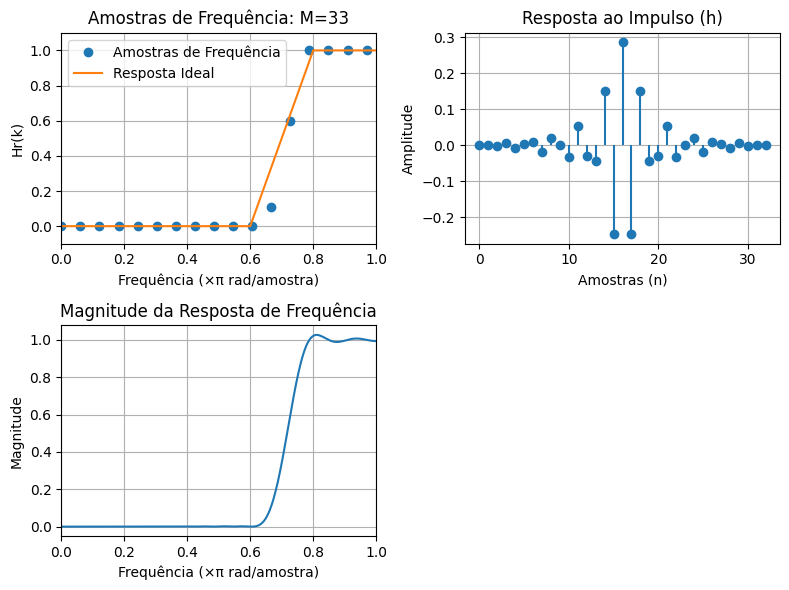

In [24]:
# Plotagem
plt.figure(figsize=(8,6))

plt.subplot(2, 2, 1)
plt.plot(wl / np.pi, Hrs, 'o', label='Amostras de Frequência')
plt.plot(wdl, Hdr, label='Resposta Ideal')
plt.axis([0, 1, -0.1, 1.1])
plt.title('Amostras de Frequência: M=33')
plt.xlabel('Frequência (×π rad/amostra)')
plt.ylabel('Hr(k)')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.stem(l, h, basefmt=" ")
plt.title('Resposta ao Impulso (h)')
plt.xlabel('Amostras (n)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(w / np.pi, mag)
plt.title('Magnitude da Resposta de Frequência')
plt.xlabel('Frequência (×π rad/amostra)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 1)

plt.tight_layout()
plt.show()